In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from pydataset import data

Exercises

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

Has the network latency gone up since we switched internet service providers?

population: all devices connected to company's internet service.

sample: all devices in the data science department

H0: there is no change in latency when switching internet providers

H1: there is a increase in latency when switching internet providers

confidence interval(B): .95

significance level(a): 1 - B = .05

p-value: if p-value < a then reject H0
         else fail to reject H0   

true positive: H0 is false, reject H0

true negative: H0 is true, fail to reject H0

type I error (false positive): rejected H0, but should have failed to reject H0

type II error(false negative): failed to reject H0, but should have rejected H0

Is the website redesign any good?

new question: Is there a change in the amount of customer visits when the website is redesigned?

population: all tab and menu option links within the company's website

sample: homepage of the company's website

H0: there is no a change in the amount of customer visits when the website is redesigned

H1: there is a greater amount of customer visits when the website is redesigned

confidence interval(B): .99

significance level(a): 1 - B = .01

p-value: if p < a then reject H0
         else fail to reject H0   

true positive: H0 is false, reject H0

true negative: H0 is true, fail to reject H0

type I error (false positive): rejected H0, but should have failed to reject H0

type II error(false negative): failed to reject H0, but should have rejected H0

Is our television ad driving more sales?

new question: Do television ads drive more sales than social media ads?

population: all ads produced by a company

sample: television and social media ads in the past year

H0: there is no difference in sales between television and social media ads

H1: social media ads drive more sales

confidence interval(B): .99

significance level(a): 1 - B = .01

p-value: if p < a then reject H0
         else fail to reject H0   

true positive: H0 is false, reject H0

true negative: H0 is true, fail to reject H0

type I error (false positive): rejected H0, but should have failed to reject H0

type II error(false negative): failed to reject H0, but should have rejected H0

Exercises 2

Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.


they are dependent. macbook users more likely to be a code up student.

H0: mac ownership affects student status

H1: mac ownership does not affect student status

In [129]:
m = np.array([[49, 20],
       [1, 30]])
chi, p , degf, exp = stats.chi2_contingency(m)

In [130]:
p

1.4116760526193828e-09

In [131]:
a = .05
if p < a:
    print('we reject to null hypothesis. appears to have relationship')
else:
    print('we fail to reject the null hypothesis')

we reject to null hypothesis. appears to have relationship


Choose another 2 categorical variables from the mpg dataset.

In [3]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [17]:
mpg['hwy_mpg'] = pd.qcut(mpg.hwy, 2, labels = ['high_hwy', 'low_hwy'] )

In [37]:
mpg['trans_type'] = np.where(mpg.trans.str.startswith('a'), 'auto', 'manual')

In [46]:
ct = pd.crosstab(mpg.trans_type, mpg.hwy_mpg)
ct

hwy,high_hwy,low_hwy
trans_type,,
auto,93,64
manual,25,52


State your null and alternative hypotheses.

H0: transmission does not affect highway mpg

H1: transmission does affect highway mpg

State your alpha.

In [42]:
a = .05

Perform a 
c
h
i
2
 test of indepedence.

In [45]:
chi, p , degf, exp = stats.chi2_contingency(ct)
p

0.00020807042407273567

In [44]:
a = .05
if p < a:
    print('we reject to null hypothesis. appears to have relationship')
else:
    print('we fail to reject the null hypothesis')

we reject to null hypothesis. appears to have relationship


Use the data from the employees database to answer these questions:


In [48]:
from sqlalchemy import text, create_engine

from env import get_connection

In [53]:
url = get_connection('employees')

In [54]:
engine = create_engine(url)

In [105]:
query = '''
        SELECT *
        FROM employees
        INNER JOIN dept_emp ON dept_emp.emp_no = employees.emp_no
        INNER JOIN departments ON dept_emp.dept_no = departments.dept_no
        '''

In [106]:
text_query= text(query)

In [107]:
df = pd.read_sql(text_query, engine.connect())
df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,emp_no,dept_no,from_date,to_date,dept_no,dept_name
0,10011,1953-11-07,Mary,Sluis,F,1990-01-22,10011,d009,1990-01-22,1996-11-09,d009,Customer Service
1,10038,1960-07-20,Huan,Lortz,M,1989-09-20,10038,d009,1989-09-20,9999-01-01,d009,Customer Service
2,10049,1961-04-24,Basil,Tramer,F,1992-05-04,10049,d009,1992-05-04,9999-01-01,d009,Customer Service
3,10060,1961-10-15,Breannda,Billingsley,M,1987-11-02,10060,d009,1992-11-11,9999-01-01,d009,Customer Service
4,10088,1954-02-25,Jungsoon,Syrzycki,F,1988-09-02,10088,d009,1992-03-21,9999-01-01,d009,Customer Service


Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

In [83]:
sm = df[(df.dept_name == 'Sales') | (df.dept_name == 'Marketing')]
sm

,emp_no,birth_date,first_name,last_name,gender,hire_date,emp_no,dept_no,from_date,to_date,dept_no,dept_name
144419,10017,1958-07-06,Cristinel,Bouloucos,F,1993-08-03,10017,d001,1993-08-03,9999-01-01,d001,Marketing
144420,10055,1956-06-06,Georgy,Dredge,M,1992-04-27,10055,d001,1992-04-27,1995-07-22,d001,Marketing
144421,10058,1954-10-01,Berhard,McFarlin,M,1987-04-13,10058,d001,1988-04-25,9999-01-01,d001,Marketing
144422,10108,1952-04-07,Lunjin,Giveon,M,1986-10-02,10108,d001,1999-12-06,2001-10-20,d001,Marketing
144423,10140,1957-03-11,Yucel,Auria,F,1991-03-14,10140,d001,1991-03-14,9999-01-01,d001,Marketing
...,...,...,...,...,...,...,...,...,...,...,...,...
331598,499976,1963-08-20,Guozhong,Felder,M,1988-12-26,499976,d007,1988-12-26,9999-01-01,d007,Sales
331599,499980,1959-06-28,Gino,Usery,M,1991-02-11,499980,d007,1991-02-11,9999-01-01,d007,Sales
331600,499986,1952-07-22,Nathan,Ranta,F,1985-08-11,499986,d007,1985-08-11,9999-01-01,d007,Sales
331601,499987,1961-09-05,Rimli,Dusink,F,1998-09-20,499987,d007,1999-12-21,9999-01-01,d007,Sales


In [87]:
sm = sm[sm.to_date == sm.to_date.max()]

In [77]:
df.dept_name == 'Marketing'

0         False
1         False
2         False
3         False
4         False
          ...  
331598    False
331599    False
331600    False
331601    False
331602    False
Name: dept_name, Length: 331603, dtype: bool

In [132]:
c = pd.crosstab(sm.gender, sm.dept_name)
c

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [134]:
chi, p , degf, exp = stats.chi2_contingency(c)

In [135]:
p

0.5691938610810126

In [136]:
a = .05
if p < a:
    print('we reject to null hypothesis. appears to have relationship')
else:
    print('we fail to reject the null hypothesis. appears to have no relationship')

we fail to reject the null hypothesis. appears to have no relationship


Is an employee's gender independent of whether or not they are or have been a manager?

In [108]:
query2 = '''
        SELECT *
        FROM employees
        INNER JOIN dept_manager ON employees.emp_no = dept_manager.emp_no
        '''

In [109]:
text_query2 = text(query2)

In [110]:
df = pd.read_sql(text_query2, engine.connect())
df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,emp_no,dept_no,from_date,to_date
0,110022,1956-09-12,Margareta,Markovitch,M,1985-01-01,110022,d001,1985-01-01,1991-10-01
1,110039,1963-06-21,Vishwani,Minakawa,M,1986-04-12,110039,d001,1991-10-01,9999-01-01
2,110085,1959-10-28,Ebru,Alpin,M,1985-01-01,110085,d002,1985-01-01,1989-12-17
3,110114,1957-03-28,Isamu,Legleitner,F,1985-01-14,110114,d002,1989-12-17,9999-01-01
4,110183,1953-06-24,Shirish,Ossenbruggen,F,1985-01-01,110183,d003,1985-01-01,1992-03-21


In [120]:
all_mgrs = df.from_date <= df.from_date.max()

In [121]:
all_mgrs.value_counts()

True    24
Name: from_date, dtype: int64

In [127]:
ctt = pd.crosstab(df.gender, all_mgrs)
ctt

from_date,True
gender,
F,13
M,11


In [124]:
chi, p , degf, exp = stats.chi2_contingency(ctt)

In [126]:
p

1.0

In [128]:
a = .05
if p < a:
    print('we reject to null hypothesis. appears to have relationship')
else:
    print('we fail to reject the null hypothesis. appears to have no relationship')

we fail to reject the null hypothesis. appears to have no relationship


Correlation Exercises

1. Answer with the type of stats test you would use (assume normal distribution):



Is there a relationship between the length of your arm and the length of your foot?

pearson r

Does smoking affect when or not someone has lung cancer?

chi_square test

Is gender independent of a person’s blood type?

chi-square test

Does whether or not a person has a cat or dog affect whether they live in an apartment?

chi-square test

Does the length of time of the lecture correlate with a student's grade?

correlation test

2. Use the telco_churn data.

In [2]:
from sqlalchemy import text, create_engine

from env import get_connection

In [8]:
url = get_connection('telco_churn')

In [9]:
engine = create_engine(url)

In [16]:
query = '''
        SELECT *
        FROM customers;
        '''

In [17]:
text_query= text(query)

In [18]:
df = pd.read_sql(text_query, engine.connect())
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


Does tenure correlate with monthly charges?

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

In [32]:
df['churn_type'] = np.where(df.churn.str.startswith('Y'), 1, 0)
df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,churn_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,Yes,Yes,No,2,Yes,2,65.60,593.3,No,0
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,Yes,1,No,2,59.90,542.4,No,0
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,No,No,No,1,Yes,1,73.90,280.85,Yes,1
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes,1
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,Yes,Yes,No,1,Yes,2,83.90,267.4,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,Yes,No,No,2,No,2,55.15,742.9,No,0
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,No,No,Yes,1,Yes,1,85.10,1873.7,Yes,1
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,No,1,Yes,2,50.30,92.75,No,0
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,Yes,No,Yes,3,No,2,67.85,4627.65,No,0


In [41]:
r, p = stats.pearsonr(df.tenure, df.monthly_charges)
r, p

(0.24789985628615005, 4.09404499149396e-99)

In [42]:
def eval_result(p_value, a = 0.05):
    
    if p_value < a:
        
        print('Your result is significant!')
        
    else:
        
        print('Your result was not significant!')

In [43]:
eval_result(p)

Your result is significant!


Total charges?

In [66]:
df['t_charges'] = df.total_charges.str.replace(' ', '0')

In [67]:
df.t_charges = df.t_charges.astype(float)
df.t_charges

0        593.30
1        542.40
2        280.85
3       1237.85
4        267.40
         ...   
7038     742.90
7039    1873.70
7040      92.75
7041    4627.65
7042    3707.60
Name: t_charges, Length: 7043, dtype: float64

In [68]:
r, p = stats.pearsonr(df.tenure, df.t_charges)
r, p

(0.8261783979502422, 0.0)

In [69]:
def eval_result(p_value, a = 0.05):
    
    if p_value < a:
        
        print('Your result is significant!')
        
    else:
        
        print('Your result was not significant!')

In [70]:
eval_result(p)

Your result is significant!


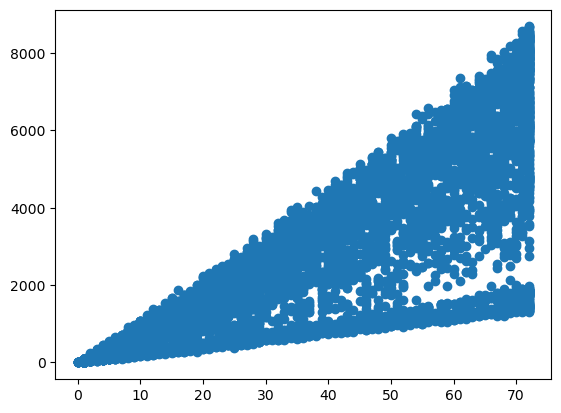

In [95]:
plt.scatter(df.tenure, df.t_charges)

What happens if you control for phone and internet service?

In [71]:
df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,churn_type,t_charges
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,Yes,No,2,Yes,2,65.60,593.3,No,0,593.30
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,Yes,1,No,2,59.90,542.4,No,0,542.40
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,No,No,1,Yes,1,73.90,280.85,Yes,1,280.85
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,Yes,1,Yes,1,98.00,1237.85,Yes,1,1237.85
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,Yes,No,1,Yes,2,83.90,267.4,Yes,1,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,No,No,2,No,2,55.15,742.9,No,0,742.90
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,No,Yes,1,Yes,1,85.10,1873.7,Yes,1,1873.70
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,1,Yes,2,50.30,92.75,No,0,92.75
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,No,Yes,3,No,2,67.85,4627.65,No,0,4627.65


In [83]:
t = df[df.internet_service_type_id == 1]
t

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,churn_type,t_charges
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,Yes,No,2,Yes,2,65.60,593.3,No,0,593.30
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,Yes,1,No,2,59.90,542.4,No,0,542.40
5,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,No,...,Yes,Yes,1,Yes,4,69.40,571.45,No,0,571.45
8,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,Yes,...,No,No,1,Yes,1,48.20,340.35,No,0,340.35
9,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,1,Yes,...,Yes,Yes,3,Yes,2,90.45,5957.9,No,0,5957.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7029,9972-NKTFD,Female,0,No,No,28,Yes,No,1,No,...,No,No,1,No,3,54.65,1517.5,No,0,1517.50
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,No,No,2,No,2,55.15,742.9,No,0,742.90
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,1,Yes,2,50.30,92.75,No,0,92.75
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,No,Yes,3,No,2,67.85,4627.65,No,0,4627.65


In [96]:
ph = t[t.phone_service == 'Yes']
ph

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,churn_type,t_charges
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,Yes,No,2,Yes,2,65.60,593.3,No,0,593.30
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,Yes,1,No,2,59.90,542.4,No,0,542.40
5,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,No,...,Yes,Yes,1,Yes,4,69.40,571.45,No,0,571.45
8,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,Yes,...,No,No,1,Yes,1,48.20,340.35,No,0,340.35
9,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,1,Yes,...,Yes,Yes,3,Yes,2,90.45,5957.9,No,0,5957.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7025,9968-FFVVH,Male,0,No,No,63,Yes,Yes,1,Yes,...,No,No,2,No,3,68.80,4111.35,No,0,4111.35
7029,9972-NKTFD,Female,0,No,No,28,Yes,No,1,No,...,No,No,1,No,3,54.65,1517.5,No,0,1517.50
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,No,No,2,No,2,55.15,742.9,No,0,742.90
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,1,Yes,2,50.30,92.75,No,0,92.75


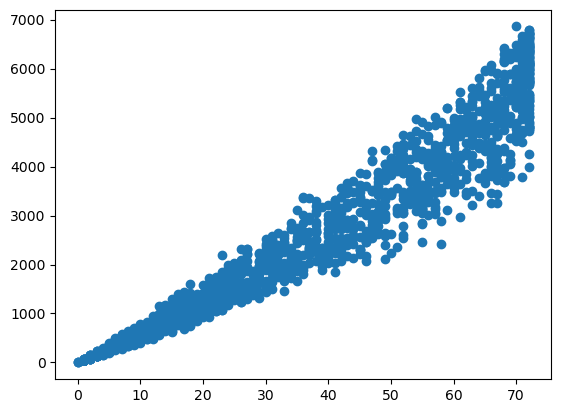

In [97]:
plt.scatter(ph.tenure, ph.t_charges)

In [98]:
r, p = stats.pearsonr(ph.tenure, ph.t_charges)
r, p

(0.9705931617494685, 0.0)

In [99]:
eval_result(p)

Your result is significant!


3. Use the employees database.

Is there a relationship between how long an employee has been with the company and their salary?

In [105]:
url = get_connection('employees')

In [106]:
query = '''
        SELECT *
        FROM employees
        INNER JOIN salaries ON salaries.emp_no = employees.emp_no;
        '''

In [109]:
engine = create_engine(url)

In [110]:
text_query= text(query)

In [127]:
df2 = pd.read_sql(text_query, engine.connect())
df2.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,emp_no,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,10001,60117,1986-06-26,1987-06-26
1,10001,1953-09-02,Georgi,Facello,M,1986-06-26,10001,62102,1987-06-26,1988-06-25
2,10001,1953-09-02,Georgi,Facello,M,1986-06-26,10001,66074,1988-06-25,1989-06-25
3,10001,1953-09-02,Georgi,Facello,M,1986-06-26,10001,66596,1989-06-25,1990-06-25
4,10001,1953-09-02,Georgi,Facello,M,1986-06-26,10001,66961,1990-06-25,1991-06-25


In [151]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844047 entries, 0 to 2844046
Data columns (total 11 columns):
 #   Column      Dtype  
---  ------      -----  
 0   emp_no      int64  
 1   birth_date  object 
 2   first_name  object 
 3   last_name   object 
 4   gender      object 
 5   hire_date   object 
 6   emp_no      int64  
 7   salary      int64  
 8   from_date   object 
 9   to_date     object 
 10  date_left   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 238.7+ MB


In [ ]:
df2.t_days

In [182]:
df2['t_days'] = (df2.from_date - df2.to_date).astype(str).str.replace(', 0:00:00', '').replace('-', '').astype(int)


ValueError: invalid literal for int() with base 10: '-365 days'

In [163]:
df2['date_left'] = df2.to_date.astype(str).str.replace('-', '').astype(int).dropna()


In [164]:
df2.date_left.values

array([19870626, 19880625, 19890625, ..., 20001129, 20011129, 99990101])

In [180]:
r, p = stats.pearsonr(df2.t_days, df2.salary)
r, p

TypeError: unsupported operand type(s) for +: 'float' and 'str'

Is there a relationship between how long an employee has been with the company and the number of titles they have had?

Answer with the type of test you would use (assume normal distribution):

Is there a difference in grades of students on the second floor compared to grades of all students?

1 sample, 2 tailed t-test

Are adults who drink milk taller than adults who don't drink milk?

2 sample, 1 tailed t-test

Is the price of gas higher in Texas or in New Mexico?

2 sample, 1 tailed t-test

Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

ANOVA 

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

H0: there is not a diiference in average time to sell between two offices
    
H1: there is a diiference in average time to sell between two offices

this will be a 2 sample, 2 tailed, t-test

In [195]:
a = .05

In [189]:
o1 = np.random.normal(90, 15, 40)
o1.size

40

In [190]:
o2 = np.random.normal(100, 20, 50)
o2.size

50

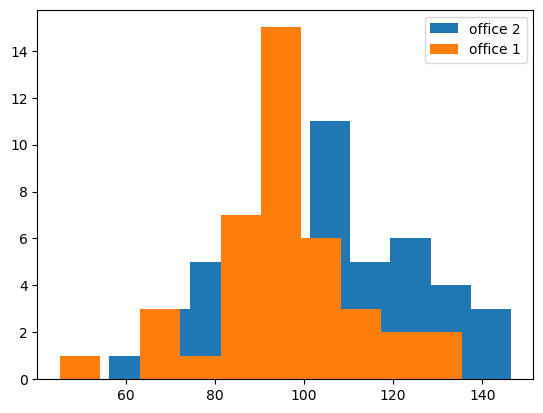

In [327]:
plt.hist(o2, label = 'office 2')
plt.hist(o1, label = 'office 1')
plt.legend()

In [192]:
o1.var()

297.22581497088186

In [193]:
o2.var()

431.6678482976597

In [191]:
t, p = stats.ttest_ind(o1, o2, equal_var=False)
t, p


(-2.042589086983942, 0.04409079850292436)

In [199]:
a = .05

if p < a:
    
    print('reject null hypothesis')
    
else:
    
    print('fail to reject null hypothesis')

reject null hypothesis


Load the mpg dataset and use it to answer the following questions:

In [262]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

H0: fuel efficiency is not different in cars from 2000 and 1999

H1: fuel efficiency is different in cars from 2000 and 1999

this will be a 2 sample, 2 tailed t-test

In [289]:
mpg['avg_m'] = (mpg.cty + mpg.hwy) / 2

In [290]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_m
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [291]:
o_eight = mpg[mpg.year == 2008].avg_m

In [292]:
ninety_nine = mpg[mpg.year == 1999].avg_m

In [293]:
o_eight.var()

24.097480106100797

In [294]:
ninety_nine.var()

27.122605363984682

In [295]:
t, p = stats.ttest_ind(o_eight, ninety_nine, equal_var = False)
t, p

(-0.21960177245940962, 0.8263750772060638)

In [296]:
a = .05

if p < a:
    
    print('reject null hypothesis')
    
else:
    
    print('fail to reject null hypothesis')

fail to reject null hypothesis


Are compact cars more fuel-efficient than the average car?

H0: compact cars are not more fuel efficient than the average car

H1: compact cars are more fuel effiecient than the average car

this will be a 1 sample, 1 tailed t-test

In [297]:
com = mpg[mpg['class'] == 'compact'].avg_m
com


1      23.5
2      25.0
3      25.5
4      25.5
5      21.0
6      22.0
7      22.5
8      22.0
9      20.5
10     24.0
11     23.0
12     20.0
13     21.0
14     21.0
15     20.0
142    25.0
143    23.0
170    22.5
171    23.5
172    22.0
173    23.5
187    24.0
188    25.0
189    26.0
190    26.5
191    22.0
192    22.0
193    22.5
194    27.0
195    28.5
196    30.5
197    32.5
198    30.5
208    25.0
209    22.5
210    25.0
211    25.5
212    20.5
213    38.5
214    25.0
215    22.5
216    25.5
217    25.0
218    25.0
219    25.0
220    19.5
221    20.5
Name: avg_m, dtype: float64

In [298]:
mpg['class'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

In [299]:
mpg.avg_m.size

234

In [303]:
avg = mpg.avg_m.mean()

In [304]:
t, p = stats.ttest_1samp(com, avg)

print(t, p/2)

7.896888573132533 2.0992818971585816e-10


In [306]:
a = .05

if p/2 > a:
    print("We fail to reject the null hypothesis.")
elif t < 0:
    print("We fail to reject null hypothesis.")
else:
    print("We reject the null hypothesis.")


We reject the null hypothesis.


Do manual cars get better gas mileage than automatic cars?

H0: manual cars do not get better gas mileage than auto cars

H1: manual cars do get better gas mileage

this will be a 2 sample 1 tailed t-test

In [312]:
mpg['trans_type'] = np.where(mpg.trans.str.startswith('a'), 'auto', 'manual')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_m,trans_type
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,auto
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,auto
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,auto


In [316]:
man_avg = mpg[mpg.trans_type == 'manual'].avg_m

In [317]:
aut_avg = mpg[mpg.trans_type == 'auto'].avg_m

In [318]:
t, p = stats.ttest_ind(man_avg, aut_avg)
t, p

(4.593437735750014, 7.154374401145683e-06)

In [321]:
if p/2 > a:
    print("We fail to reject the null hypothesis.")
elif t < 0:
    print("We fail to reject null hypothesis.")
else:
    print("We reject the null hypothesis.")

We reject the null hypothesis.


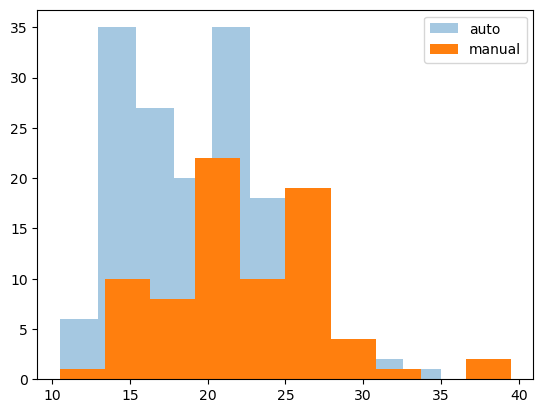

In [329]:
plt.hist(aut_avg, label = 'auto', alpha = .4)
plt.hist(man_avg, label = 'manual')
plt.legend()